In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from astropy.cosmology import WMAP9 as cosmo
from astropy import constants
from astropy import units as u
import matplotlib as mpl

import scipy.integrate as integrate

mpl.rcParams['agg.path.chunksize'] = 10000
plt.rcParams.update({
	'font.family':'serif',
	'mathtext.fontset' : 'cm',
	'mathtext.rm': 'serif',
	'font.weight': 'normal',
	'font.size': 10})
plt.rcParams.update({'font.size': 10})

In [2]:
G=constants.G
H_0=cosmo.H(0).to(u.yr**-1)
#H_0=(100*u.km*u.s**-1*u.Mpc**-1).to(u.yr**-1)
M_sun=constants.M_sun
h=0.73
h7=1.05

rho_0=((3*H_0**2)/(8*np.pi*G)/M_sun).to(u.Mpc**-3).value
omega_m=0.27
x_eq=125
k_eq=x_eq**-1

In [18]:
((3*H_0**2)/(8*np.pi*G)/M_sun).to(u.Mpc**-3).value

133363631951.67577

In [3]:
z=20
z_i=1

def Time(z):
  return ((2*H_0**(-1))/(1+(1+z)**2))

t=Time(z)
t_0=Time(0)
t_i=Time(z_i)
ns=0.95
kpivot = 2e-3

R=11.4*h7**-1

In [6]:
def SigmaT(sigma, t):
  return sigma*(t/t_i)**(2/3)

def TransferFunction(k):
    q=2.04/(omega_m*h7**2)
    return np.log(1+2.34*q*k)/(2.34*q*k*(1+3.89*q*k+(16.1*q*k)**2+(5.46*q*k)**3+(6.71*q*k)**4)**(1/4))
N=1
def PowerSpectrum(k):
    return N*TransferFunction(k)**2*k*(k/kpivot)**(ns-1)

def TopHatNorm(R):

    s8= 1/(2*np.pi**2)*integrate.quad(lambda k: k**2*PowerSpectrum(k)*(3/(k*R)**3*(np.sin(k*R)-k*R*np.cos(k*R)))**2, 0, np.inf)[0]

    return 0.76*0.76/s8

N=TopHatNorm(R)

Text(0, 0.5, '$IMF$')

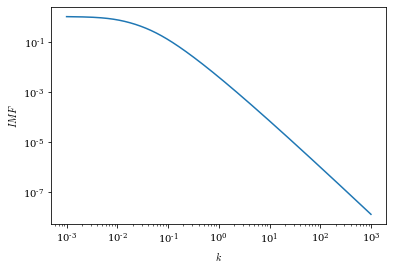

In [7]:
K=np.logspace(-3, 3, 1000)
plt.plot(K, TransferFunction(K))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$k$')
plt.ylabel('$IMF$')

In [8]:
def TopHatSigma(M):

    K=((4*np.pi/3*rho_0)/M)**(1/3)

    s = np.zeros(len(K))   
    
    for i in range(len(K)):
        s[i] = (1/(2*np.pi**2)*integrate.quad(lambda k: k**2*PowerSpectrum(k)*(3/(k/K[i])**3*(np.sin(k/K[i])-k/K[i]*np.cos(k/K[i])))**2, 0, np.inf)[0])**(1/2)
    
    return K, s

In [9]:
def GaussianSigma(M):

    K=0.643*(((2*np.pi)**(2/3)*rho_0)/M)**(1/3)

    s = np.zeros(len(K))    

    for i in range(len(K)):
        
        s[i] = (1/(2*np.pi**2)*integrate.quad(lambda k: k**2*PowerSpectrum(k)*(np.exp(-(k/K[i])**2/2))**2, 0, np.inf)[0])**(1/2)
    
    return K, s

In [10]:
def KSharpSigma(M):
  
  K=0.414*((6*np.pi**2*rho_0)/M)**(1/3)

  s=np.zeros(len(K))

  for i in range(len(K)):
        
      s[i] = integrate.quad(lambda k: k**2*PowerSpectrum(k), 0, K[i])[0]

  return K, np.sqrt(1/(2*np.pi**2)*s)

In [11]:
M=np.logspace(1,20,10000)

In [12]:
K_ksharp, S_ksharp = KSharpSigma(M)
K_th, S_th = TopHatSigma(M)
K_g, S_g = GaussianSigma(M)

<ipython-input-8-c12cd466fe77>:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  s[i] = (1/(2*np.pi**2)*integrate.quad(lambda k: k**2*PowerSpectrum(k)*(3/(k/K[i])**3*(np.sin(k/K[i])-k/K[i]*np.cos(k/K[i])))**2, 0, np.inf)[0])**(1/2)


In [13]:
# S_ksharpT=SigmaT(S_ksharp, t)/N
# S_thT=SigmaT(S_th, t)/N
# S_gT=SigmaT(S_g, t)/N

In [14]:
K_ksharp, S_ksharp = KSharpSigma(M)
S_ksharpT=SigmaT(S_ksharp, t)

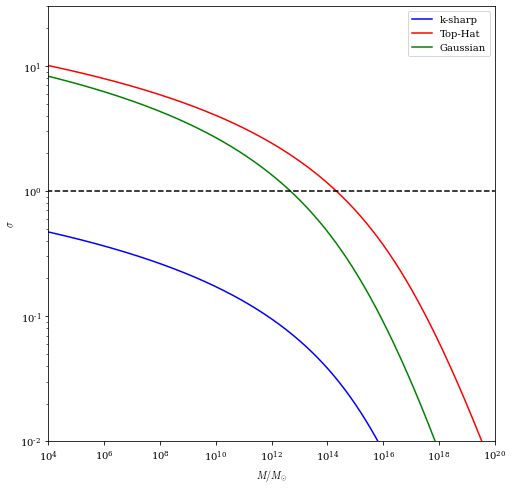

In [15]:
plt.subplots(figsize=(8,8))

plt.plot(M, S_ksharpT, c='b', label='k-sharp')
plt.plot(M, S_th, c='r', label='Top-Hat')
plt.plot(M, S_g, c='green', label='Gaussian')
plt.plot((1e2,1e20), (1,1), 'k--')

plt.xscale('log')
plt.xlabel('$M/M_{\odot}$')
plt.ylabel('$\sigma$')
plt.yscale('log')
plt.xlim(1e4,1e20)
plt.ylim(1e-2,3e1)
plt.legend()

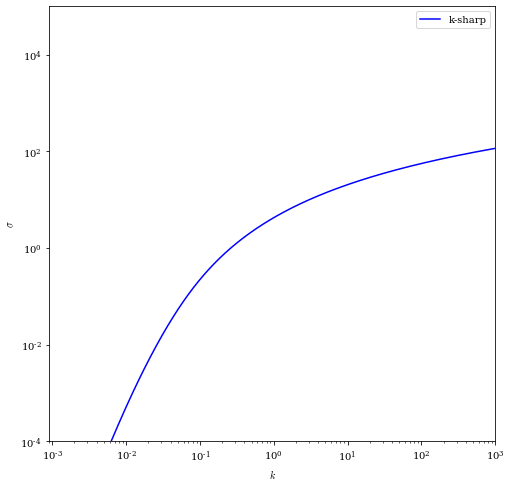

In [17]:
plt.subplots(figsize=(8,8))
# #plt.plot((sigma2(M)[1])/u.Mpc, sigma2t(sigma2(M)[0], t))
plt.plot(K_ksharp, S_ksharp**2, c='b', label='k-sharp')
# plt.plot(K_th, S_thT, c='r', label='Top-Hat')
# plt.plot(K_g, S_gT, c='green', label='Gaussian')
plt.xscale('log')
plt.xlabel('$k$')
plt.ylabel('$\sigma$')
plt.yscale('log')

plt.xlim(0.0009,1000)
plt.ylim(0.0001,1e5)
plt.legend()

In [ ]:
def Delta_c(t):
  return 1.686*(t_i/t)**(2/3)

def DLogSigma2(M):

  sigma_plus=KSharpSigma(1.01*M)[1]
  sigma=KSharpSigma(M)[1]
  dlogsigma=(np.log(sigma_plus)-np.log(sigma))/(0.01*M)
  
  return dlogsigma


In [ ]:
dlogsdlogm=np.abs(DLogSigma2(M))

In [ ]:
sigma=S_ksharp

IMF=rho_0*((Delta_c(t)/sigma))/((2*np.pi)**(1/2)*M)*np.exp(-Delta_c(t)**2/(2*sigma**2))*dlogsdlogm

(1e-12, 100)

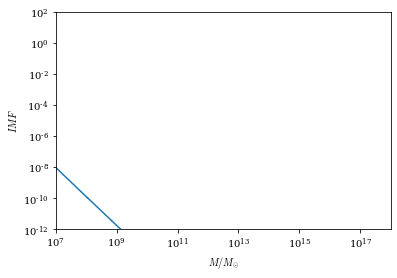

In [ ]:
plt.plot(M, IMF)
plt.xscale('log')
plt.xlabel('$M/M_{\odot}$')
plt.ylabel('$IMF$')
plt.yscale('log')
plt.xlim(1e7,1e18)
plt.ylim(1e-12,100)

In [ ]:
dlogsdlogm

array([4.44279551e-03, 4.44090960e-03, 4.43902449e-03, ...,
       6.51320226e-21, 6.51037778e-21, 6.50755451e-21])

In [ ]:
rho_0


133363631951.67577

In [ ]:
def test(function, sigma):
    if function==Delta_c:
        print('ok')
    print(Delta_c(sigma))

In [ ]:
test(Delta_c, 1)

ok
305.4879254181157 yr(2/3)
